In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta, TH
import matplotlib.pyplot as plt

In [47]:
def optionChain (expirydate):

    urlheader = {
      "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36",
      "authority": "www.nseindia.com",
      "scheme":"https"
    }
    
    url="https://www.nseindia.com/live_market/dynaContent/live_watch/option_chain/optionKeys.jsp?"
    params="segmentLink=17&instrument=OPTIDX&symbol=NIFTY&date="
    
    url_encoded=url + params + expirydate
    
    req = requests.get(url_encoded, headers=urlheader,verify = False)
    soup = BeautifulSoup(req.content, "lxml")
    table = soup.find('table', id="octable")
    
    rows = table.findAll('tr')
    header_text = []
    headers = rows[1]
    
    # jugaad to weed out unwanted columns
    remove_indices_for_put = [0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,18,22]
    remove_indices_for_call = [0,4,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22]    
    
    # add the header text to array
    for th in headers.findAll('th'):
        header_text.append(th.text)

    header_text = [i for j, i in enumerate(header_text) if j not in remove_indices_for_put]
    
    # Creating an empty Dataframe with column names only
    df_call = pd.DataFrame(columns=header_text)
    df_put = pd.DataFrame(columns=header_text)

    #row_text_array = []
    for row in rows[2:-1]:
        row_text = []
        row_text_call = []
        row_text_put = []
        # loop through the elements
        for row_element in row.findAll(['th', 'td']):
            # append the array with the elements inner text
            row_text.append(row_element.text.replace('\n', '').strip())
    
        # append the text array to the row text array
        row_text_put = [i for j, i in enumerate(row_text) if j not in remove_indices_for_put]
        for i in range(len(row_text_put)):
            if (row_text_put[i]=='-'):
                row_text_put[i]=0
            else:
                row_text_put[i]=row_text_put[i].replace(',', '')
                row_text_put[i]=float(row_text_put[i])
        row_text_call = [i for j, i in enumerate(row_text) if j not in remove_indices_for_call]
        row_call_temp=[None] * len(row_text_call)
        for i in range(len(row_text_call)):       
            if (row_text_call[i]=='-'):
                row_call_temp[len(row_text_call)-i-1]=0
            else:
                row_text_call[i]=row_text_call[i].replace(',', '')
                row_text_call[i]=float(row_text_call[i])
                row_call_temp[len(row_text_call)-i-1]=row_text_call[i]
        df_call = df_call.append(pd.Series(dict(zip(df_call.columns, row_call_temp))), ignore_index=True)
        df_put = df_put.append(pd.Series(dict(zip(df_put.columns, row_text_put))), ignore_index=True)    
        
        
    df_call['OI'] = pd.to_numeric(df_call['OI'])
    df_call=df_call.nlargest(3, ['OI'])
    df_call.set_index('Strike Price', inplace=True)
    print("Top 3 Strike price of Call Option based on Open Interest for Expiry Date = "+expirydate)
    df_call=df_call.sort_index(axis = 0) 
    print(df_call)
    
   
    df_call.plot.barh(title='Top 3 Call Option based on OI for Option Expiry = '+expirydate)
    
 
    
    print("================================================================================") 
    df_put['OI'] = pd.to_numeric(df_put['OI'])
    df_put=df_put.nlargest(3, ['OI'])
    df_put.set_index('Strike Price', inplace=True)
    print("Top 3 Strike price of Put Option based on Open Interest for Expiry Date = "+expirydate)
    print(df_put)
    df_put=df_put.sort_index(axis = 0) 
    df_put.plot.barh( title='Top 3 Put Option based on OI for Option Expiry = '+expirydate)
    return(df_call,df_put)

In [48]:
str_next_thursday_expiry,str_month_last_thu_expiry=nextThu_and_lastThu_expiry_date()
print("================================================================================")
print("Next Expiry Date = " + str_next_thursday_expiry)
print("================================================================================")
print("Month End Expiry Date = " + str_month_last_thu_expiry)
print("================================================================================")

Next Expiry Date = 16APR2020
Month End Expiry Date = 30APR2020


Call/Put Option data of next Thursday expiry =  16APR2020


C:\Users\gileadb\Anaconda\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\gileadb\Anaconda\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Top 3 Strike price of Call Option based on Open Interest for Expiry Date = 16APR2020
                 LTP   Volume  Chng in OI        OI
Strike Price                                       
9000.0        265.00  48508.0    255450.0  573225.0
9500.0         70.00  62969.0    442500.0  859200.0
10000.0        13.75  31088.0    405675.0  626850.0
Top 3 Strike price of Put Option based on Open Interest for Expiry Date = 16APR2020
                LTP   Volume  Chng in OI         OI
Strike Price                                       
8000.0         25.0  39035.0    609075.0  1081650.0
8500.0         72.5  59591.0    651900.0  1053000.0
9000.0        215.1  45507.0    459525.0   576450.0


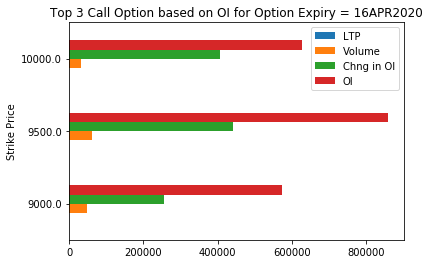

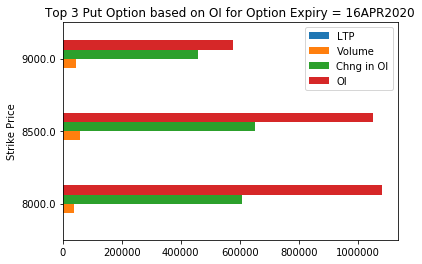

In [49]:
print("Call/Put Option data of next Thursday expiry =  "+str_next_thursday_expiry)
print("================================================================================")
df_call_near_expiry,df_put_near_expiry=optionChain(str_next_thursday_expiry)

Call/Put Option data of last Thursday of a month expiry =  30APR2020


C:\Users\gileadb\Anaconda\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\gileadb\Anaconda\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Top 3 Strike price of Call Option based on Open Interest for Expiry Date = 30APR2020
                LTP   Volume  Chng in OI         OI
Strike Price                                       
9000.0        434.0  42834.0    -86025.0  1456125.0
9500.0        192.0  39255.0     54600.0  1219125.0
10000.0        71.7  57679.0     44625.0  1518900.0
Top 3 Strike price of Put Option based on Open Interest for Expiry Date = 30APR2020
                 LTP   Volume  Chng in OI         OI
Strike Price                                        
8000.0        123.20  39969.0    240975.0  2554500.0
7500.0         70.25  25460.0    -49950.0  1940325.0
7000.0         39.40  15095.0    147375.0  1868700.0


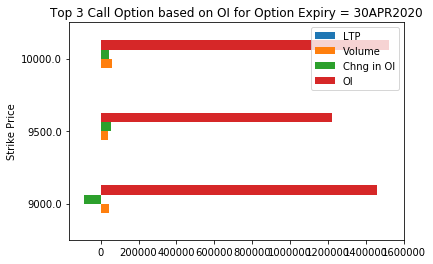

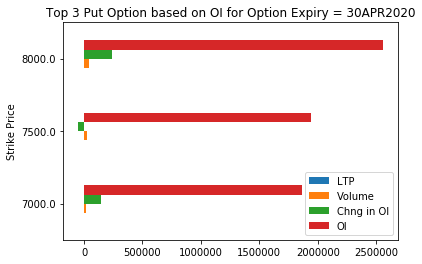

In [32]:
print("================================================================================")
print("Call/Put Option data of last Thursday of a month expiry =  "+str_month_last_thu_expiry)
df_put_near_expiry,df_put_last_expiry=optionChain(str_month_last_thu_expiry)
print("================================================================================")

In [42]:
# cols = ['Chart', 'OI', 'Chng in OI', 'Volume', 'IV', 'LTP', 'Net Chng', 'BidQty', 'BidPrice', 'AskPrice', 'AskQty', 'Strike Price', 'BidQty', 'BidPrice', 'AskPrice', 'AskQty', 'Net Chng', 'LTP', 'IV', 'Volume', 'Chng in OI', 'OI', 'Chart']
# cols.index('LTP')

5